In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

In [ ]:
cmap_bold = ListedColormap(["#FF0000", "#0000FF"])
cmap_light = ListedColormap(['#FFBBBB', '#BBBBFF'])

In [ ]:
def sigmoid(h):
  return 1/(1+ np.exp(-h))

def cross_entropy(y, p_hat):
  return -(1/len(y))*np.sum(y*np.sum(y*np.log(p_hat)+ (1-y)*np.log(1-p_hat)))

def accuracy( y, y_hat):
  return np.mean(y==y_hat)

In [ ]:
class LogR():

  def __init__(self, thresh = .5):
    self.thresh = thresh
    self.w = None
    self.b = None


  def fit(self, X,y, eta = 1e-3,epochs= 1e3, show_curve = False):
    epochs = int(epochs)
    N,D = X.shape

    self.w = np.random.randn(D)
    self.b = np.random.randn(1)

    J = np.zeros(epochs)

    for epoch in range(epochs):
      p_hat = self.__forward(X)
      J[epoch] = cross_entropy(y,p_hat)

      self.w -= eta*(1/N)*X.T@(p_hat-y)
      self.b -= eta*(1/N)*np.sum(p_hat-y) 

    if show_curve:
      plt.figure(figsize=(10,10))
      plt.plot(J)
      plt.xlabel('Epochs')
      plt.ylabel('$\mathcal{J}$')
      plt.title('Training Curve')
      plt.show()

  def __forward(self, X):
    return sigmoid(X@self.w + self.b)

  def predict(self, X):
    return (self.__forward(X) >= self.thresh).astype(np.int32)

In [ ]:
def main():
  N = 1000
  D = 2

  X0 = np.random.randn((N//2),D) + np.array([1, 1])
  X1 = np.random.randn((N//2),D) + np.array([-1, -1])
  X = np.vstack((X0, X1))

  y = np.array([0]*(N//2) + [1]*(N//2))


  plt.figure()
  plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.5)
  plt.show()


  df=pd.DataFrame(X)
  df=pd.concat([df, pd.DataFrame(y)], axis=1)
  df.to_csv("LogReg1.csv")

  log_reg = LogR()
  log_reg.fit(X, y, eta = 1e-1, show_curve = True)
  y_hat = log_reg.predict(X)

  print(f"Training Accuracy: {accuracy(y, y_hat):0.4f}")

  x1 = np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, 1000)
  x2 = -(log_reg.b/log_reg.w[1]) - (log_reg.w[0]/log_reg.w[1])*x1


  plt.figure()
  plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.5)
  plt.plot(x1, x2, color = "#000000", linewidth = 2)
  plt.show()

  xx1, xx2 = np.meshgrid(x1, x1)
  Z = log_reg.predict(np.c_[xx1.ravel(),xx2.ravel()]).reshape(*xx1.shape)

  plt.figure()
  plt.pcolormesh(xx1, xx2, Z, cmap = cmap_light)
  plt.scatter(X[:,0], X[:,1], c = y, cmap = cmap_bold)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  plt.show()

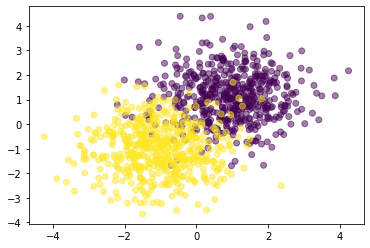

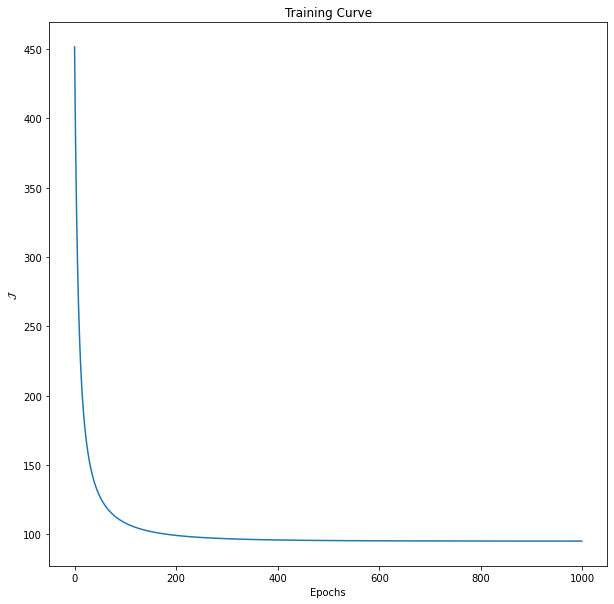

Training Accuracy: 0.9310


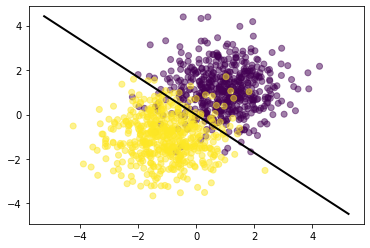

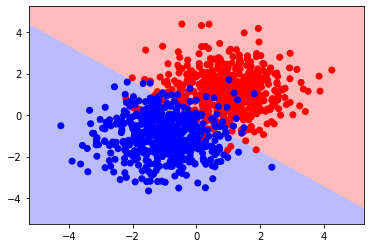

In [ ]:
main()